<a href="https://colab.research.google.com/github/Abdulmomen96/CASA/blob/main/final_rnn_cnn_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras.losses
import tensorflow as tf
#from examples_helpers import _parse_example
from tqdm import tqdm
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalMaxPool2D
import numpy as np
#from cv2 import resize, INTER_CUBIC


In [2]:
from keras.datasets import mnist
dataset = mnist.load_data()
import tensorflow as tf

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
'''
from google.colab import drive
drive.mount('/content/drive')
'''

"\nfrom google.colab import drive\ndrive.mount('/content/drive')\n"

In [4]:
import numpy as np


In [8]:
from itertools import cycle
dataset = mnist.load_data()
(x_train, y_train), (x_test, y_test) = dataset
x_train = cycle(x_train)
y_train = cycle(y_train)
x_test = cycle(x_test)
y_test = cycle(y_test)
def gen_data():
  
  while True:
    n1 = np.random.random_integers(0, 10, size=1)
    n1 = n1 % 2
    n_s1 = 30
    x1 = []
    for i1, j1 in zip(x_train, y_train):
     if j1 % 2 == n1:
       x1.append(np.expand_dims((i1 / 255), axis=-1))
       if len(x1) == n_s1:
         break

    yield np.array(x1), n1

def gen_data_test():
  
  while True:
    n = np.random.random_integers(0, 10, size=1)
    n = n % 2
    n_s = 30
    x = []
    for i, j in zip(x_test, y_test):
     if j % 2 == n:
       x.append(np.expand_dims((i / 255), axis=-1))
       if len(x) == n_s:
         break

    yield np.array(x), n



In [9]:
dataset = tf.data.Dataset.from_generator(gen_data, output_types=(tf.float32, tf.int32), output_shapes=((30, 28, 28, 1), (1)))
validation_dataset = tf.data.Dataset.from_generator(gen_data_test, output_types=(tf.float32, tf.int32), output_shapes=((30, 28, 28, 1), (1)))

In [10]:
for i, j in validation_dataset.take(5):
  print(i.shape, j)

(30, 28, 28, 1) tf.Tensor([0], shape=(1,), dtype=int32)
(30, 28, 28, 1) tf.Tensor([0], shape=(1,), dtype=int32)
(30, 28, 28, 1) tf.Tensor([0], shape=(1,), dtype=int32)
(30, 28, 28, 1) tf.Tensor([0], shape=(1,), dtype=int32)
(30, 28, 28, 1) tf.Tensor([1], shape=(1,), dtype=int32)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: This function is deprecated. Please call randint(0, 10 + 1) instead


In [11]:
def LSTM(rnn_units): 
  return tf.keras.layers.LSTM(
    rnn_units, 
    return_sequences=False, 
    recurrent_initializer='glorot_uniform',
    recurrent_activation='sigmoid',
    stateful=True,
  )

In [12]:
def build_model(output_size, rnn_units, batch_size):
  model = tf.keras.Sequential([
    # Layer 1: Embedding layer to transform indices into dense vectors 
    #   of a fixed embedding size
    tf.keras.layers.TimeDistributed(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))),
    tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPooling2D((2, 2))),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Conv2D(64, (3, 3), activation='relu')),
    tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPooling2D((2, 2))),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Conv2D(64, (3, 3), activation='relu')),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Flatten()),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(64, activation='relu')),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(10)),

    # Layer 2: LSTM with `rnn_units` number of units. 
    # TODO: Call the LSTM function defined above to add this layer.
    LSTM(rnn_units),

    # Layer 3: Dense (fully-connected) layer that transforms the LSTM output
    #   into the vocabulary size. 
    # TODO: Add the Dense layer.
    tf.keras.layers.Dense(output_size),
  ])

  return model

# Build a simple model with default hyperparameters. You will get the 
#   chance to change these later.
model = build_model(2, rnn_units=1024, batch_size=32)

In [13]:
model.build(input_shape=[32, None, 28, 28, 1])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (32, None, 26, 26, 32)    320       
_________________________________________________________________
time_distributed_1 (TimeDist (32, None, 13, 13, 32)    0         
_________________________________________________________________
time_distributed_2 (TimeDist (32, None, 11, 11, 64)    18496     
_________________________________________________________________
time_distributed_3 (TimeDist (32, None, 5, 5, 64)      0         
_________________________________________________________________
time_distributed_4 (TimeDist (32, None, 3, 3, 64)      36928     
_________________________________________________________________
time_distributed_5 (TimeDist (32, None, 576)           0         
_________________________________________________________________
time_distributed_6 (TimeDist (32, None, 64)            3

In [15]:
train = cycle(dataset.batch(32))
test = cycle(validation_dataset.batch(32))


In [16]:
from google.colab.patches import cv2_imshow
from cv2 import resize
from time import sleep
from IPython.display import clear_output 



In [17]:
'''
for i, j in validation_dataset.take(10):
  print(j)
  for k in range(5):
    print(i[k].shape)
    temp = i[k].numpy() * 255
    temp = resize(temp, (128, 128))
    cv2_imshow(temp,)
    sleep(2)
  clear_output()
'''

'\nfor i, j in validation_dataset.take(10):\n  print(j)\n  for k in range(5):\n    print(i[k].shape)\n    temp = i[k].numpy() * 255\n    temp = resize(temp, (128, 128))\n    cv2_imshow(temp,)\n    sleep(2)\n  clear_output()\n'

In [18]:
for i in range(10):
  x, y = next(test)
  print(x.shape, y.shape)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: This function is deprecated. Please call randint(0, 10 + 1) instead


(32, 30, 28, 28, 1) (32, 1)
(32, 30, 28, 28, 1) (32, 1)
(32, 30, 28, 28, 1) (32, 1)
(32, 30, 28, 28, 1) (32, 1)
(32, 30, 28, 28, 1) (32, 1)
(32, 30, 28, 28, 1) (32, 1)
(32, 30, 28, 28, 1) (32, 1)
(32, 30, 28, 28, 1) (32, 1)
(32, 30, 28, 28, 1) (32, 1)
(32, 30, 28, 28, 1) (32, 1)


In [19]:

x_batch, y_batch = next(train)
a, b = next(test)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: This function is deprecated. Please call randint(0, 10 + 1) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: This function is deprecated. Please call randint(0, 10 + 1) instead


In [20]:
!pip install mitdeeplearning
import mitdeeplearning as mdl

from tqdm import tqdm

     |████████████████████████████████| 2.1 MB 22.5 MB/s 
  Created wheel for mitdeeplearning: filename=mitdeeplearning-0.2.0-py3-none-any.whl size=2115443 sha256=bcd152d7844c4ffc0483dc850afe5881853944032c0081ffda2c0e29e876c9c8
  Stored in directory: /root/.cache/pip/wheels/9a/b9/4f/99b7c8c5c75355550b83e1fcfc02956fb40c35eb01e2262877
Successfully built mitdeeplearning


In [21]:
def compute_loss(labels, logits):
  loss = tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True) # TODO
  return loss

'''TODO: compute the loss using the true next characters from the example batch 
    and the predictions from the untrained model several cells above'''

'TODO: compute the loss using the true next characters from the example batch \n    and the predictions from the untrained model several cells above'

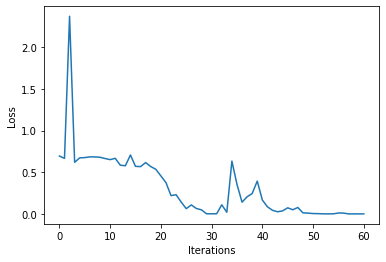

  6%|▌         | 61/1000 [02:39<41:44,  2.67s/it]

KeyboardInterrupt: ignored

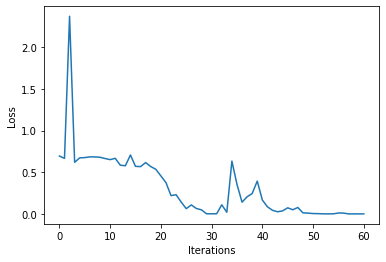

In [22]:
checkpoint_prefix = './cnn_rnn_mnist/newmodel.ckpt'
optimizer = tf.optimizers.Adam(learning_rate=1e-3)

@tf.function
def train_step(x, y): 
  # Use tf.GradientTape()
  with tf.GradientTape() as tape:
  
    '''TODO: feed the current input into the model and generate predictions'''
    y_hat = model(x)
  
    '''TODO: compute the loss!'''
    loss = compute_loss(y, y_hat)

  # Now, compute the gradients 
  '''TODO: complete the function call for gradient computation. 
      Remember that we want the gradient of the loss with respect all 
      of the model parameters. 
      HINT: use `model.trainable_variables` to get a list of all model
      parameters.'''
  grads = tape.gradient(loss, model.trainable_variables)
  
  # Apply the gradients to the optimizer so it can update the model accordingly
  optimizer.apply_gradients(zip(grads, model.trainable_variables))
  return loss

##################
# Begin training!#
##################
top_acc = 0
history = []
plotter = mdl.util.PeriodicPlotter(sec=2, xlabel='Iterations', ylabel='Loss')
if hasattr(tqdm, '_instances'):
  tqdm._instances.clear() # clear if it exists
for iter in tqdm(range(1000)):

  # Grab a batch and propagate it through the network
  x_batch, y_batch = next(train)
  loss = train_step(x_batch, y_batch)
  
  x, y = next(test)
  y_val = model(x)
  acc = tf.keras.metrics.Accuracy()
  acc.update_state(tf.argmax(y_val, axis=1), y)
  accuracy = acc.result().numpy()
  #acc = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(y_val, axis = 1), tf.cast(y_test, tf.int64)), tf.int64)).numpy()
  if top_acc < accuracy:
    top_acc = accuracy
  if iter % 5 == 0:
    #top_acc = accuracy
    print("Maximum_acc: " + str(top_acc))
    print("epoch: " + str(iter) + "  loss = " + str(loss.numpy().mean()))      
  
  # Update the progress bar
  history.append(loss.numpy().mean())
  plotter.plot(history)

  # Update the model with the changed weights!     
    
    
# Save the trained model and the weights
model.save_weights(checkpoint_prefix)

In [ ]:
x, y = next(test)
y_val = model(x)
y_val = np.argmax(y_val, axis=-1)
print(y_val.shape)
for n, (i, j) in enumerate(zip(x, y)):
  print(j.numpy(), y_val[n])
  for k in range(5):
    print(i[k].shape)
    temp = i[k].numpy() * 255
    temp = resize(temp, (128, 128))
    cv2_imshow(temp,)
    sleep(2)
  clear_output()

In [ ]:
model.save(checkpoint_prefix)

In [ ]:
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
image = cv2.imread('/Rio.jpg')

In [ ]:
import numpy as np


In [ ]:
array = np.array(image)

In [ ]:
print(array.shape)

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [ ]:
print(gray.shape)

In [ ]:
color = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)

In [ ]:
from cv2 import imshow

In [ ]:
  from google.colab.patches import cv2_imshow

In [ ]:
cv2_imshow(image)

In [ ]:
cv2_imshow(gray)

In [ ]:
cv2_imshow(color)

In [ ]:
print(np.array(color).shape)